In [1]:
import sqlite3
import pandas as pd

In [2]:
db = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [49]:
query = """ SELECT timestamp, uid FROM checker
WHERE uid LIKE 'user_%'"""
commits = pd.read_sql(query, db, parse_dates='timestamp')
commits

,timestamp,uid
0,2020-04-17 05:19:02.744528,user_4
1,2020-04-17 05:22:35.249331,user_4
2,2020-04-17 05:22:45.549397,user_4
3,2020-04-17 05:34:14.691200,user_4
4,2020-04-17 05:34:24.422370,user_4
...,...,...
3202,2020-05-21 20:19:06.872761,user_1
3203,2020-05-21 20:22:41.785725,user_1
3204,2020-05-21 20:22:41.877806,user_1
3205,2020-05-21 20:37:00.129678,user_1


In [51]:
commits['hour'] = commits['timestamp'].dt.hour
commits['day'] = commits['timestamp'].dt.day
commits['weekday'] = commits['timestamp'].dt.dayofweek
commits['type'] = commits['weekday'].apply(lambda x: 'weekend' if x>=5 else 'working_day')
commits = commits.drop(columns = ['weekday'])
avg = commits.groupby(['type', 'day', 'hour']).count()
avg = avg.groupby(
    ['type', 'hour']).mean()['uid'].reset_index()
avg

,type,hour,uid
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [56]:

pivot = pd.pivot(avg, values= 'uid', index='hour', columns = 'type')
full_hours = pd.Index(range(24),name='hour')
pivot = pivot.reindex(full_hours)
pivot

type,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,NaN
2,NaN,NaN
3,1.000000,2.000000
4,NaN,NaN
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


array([<Axes: title={'center': 'weekend'}, xlabel='hour'>,
       <Axes: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

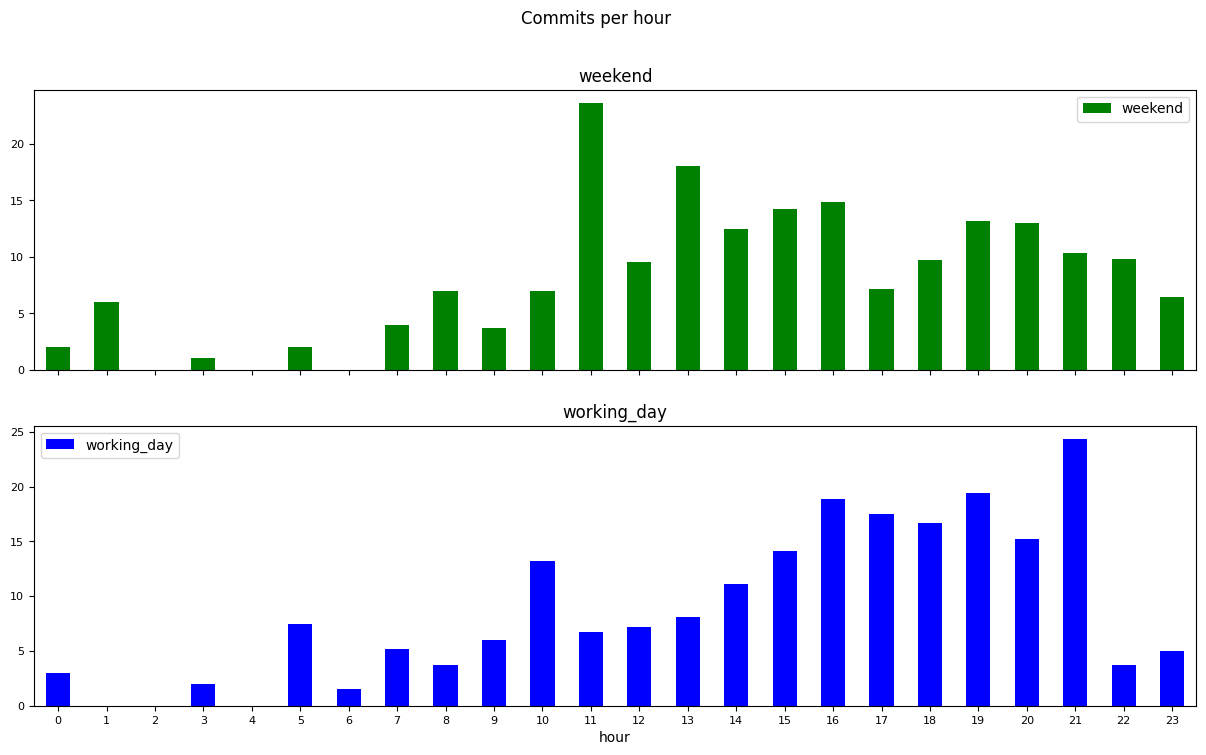

In [59]:
pivot.plot(kind='bar', figsize=(15,8), title='Commits per hour', rot=0, fontsize=8, color=['green', 'blue'], subplots=True)

In [60]:
db.close()

Is the dynamic different on working days and weekends?

21 11